# **Partie 1 : Data analysis**

Ce notebook vise à vous guider à travers les différentes étapes de l'analyse de données en utilisant Pandas. Nous explorerons un jeu de données, effectuerons des opérations d'exploration, de visualisation, et de nettoyage pour obtenir des informations significatives. 

<img src='https://miro.medium.com/max/1200/1*Pl9OyXXrLH_5JiQB8vNx3w.jpeg' width=900>

L'analyse de données joue un rôle essentiel dans le processus de compréhension, de traitement et de prise de décision basée sur les informations contenues dans nos données.


Nous allons suivre les étapes suivantes :
1. **Exploration des Données** : Avant de plonger dans l'analyse approfondie, il est crucial d'explorer nos données. Cela implique la compréhension des caractéristiques disponibles, la détection des valeurs manquantes, l'identification des types de données, et l'obtention d'une vue d'ensemble initiale de la distribution des données. 

2. **Visualisation des Données** : La visualisation des données est un moyen efficace de comprendre les données et de communiquer les résultats. Nous allons utiliser des graphiques pour explorer les relations entre les variables et pour identifier les tendances et les anomalies.

3. **Préparation des Données** : Le nettoyage des données est une étape cruciale pour garantir la qualité de nos analyses. Cela implique la gestion des valeurs manquantes, la correction des erreurs, la normalisation des données, et la transformation des variables si nécessaire.

Nous utiliserons les bibliothèques suivantes :
- [Pandas](https://pandas.pydata.org/) : Pandas est une bibliothèque Python qui fournit des structures de données et des outils d'analyse de données faciles à utiliser. Il est largement utilisé dans la communauté scientifique pour explorer et analyser les données.
- [Matplotlib](https://matplotlib.org/) : Matplotlib est une bibliothèque Python pour la visualisation des données. Elle fournit des outils pour produire des graphiques de haute qualité en utilisant des commandes simples.
- [Seaborn](https://seaborn.pydata.org/) : Seaborn est une bibliothèque Python pour la visualisation des données. Elle est basée sur Matplotlib et offre une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs.
- [NumPy](https://numpy.org/) : NumPy est une bibliothèque Python pour la manipulation des tableaux et des matrices multidimensionnels. Elle fournit des fonctions pour effectuer des opérations mathématiques sur ces tableaux.




## 1. Data Exploration

Dans cette partie, nous allons explorer les données de la base de données **[Customer Segmentation Classification](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation)** provenant de la plateforme Kaggle. Il s'agit d'un ensemble de données synthétiques qui contient des informations sur les clients d'une entreprise. 

L'objectif est de prédire l'une des variables du jeu de données en fonction de ses caractéristiques.

### Description des Variables

| Variable | Définition |
|----------|------------|
| ID | Identifiant unique |
| Gender | Genre du client |
| Ever_Married | Statut matrimonial du client |
| Age | Âge du client |
| Graduated | Le client est-il diplômé ? |
| Profession | Profession du client |
| Work_Experience | Expérience professionnelle en années |
| Spending_Score | Score de dépenses du client |
| Family_Size | Nombre de membres de la famille du client (y compris le client) |
| Var_1 | Catégorie anonymisée pour le client |
| Segmentation | (cible) Segment du client |

In [1]:
# Import de la librairie pandas et numpy
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [2]:
# Visualisation des dimension du jeu de données
df.shape

(8068, 11)

In [3]:
# Visualisation des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
# Visualisation des données statistiques
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
# Visualisation des données manquantes
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
# Visualisation des données dupliquées
df.duplicated().sum()

0

In [7]:
# Sélection des variables qualitatives
df.select_dtypes(exclude=['int', 'float'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
8063,Male,No,No,NaN,Low,Cat_1,D
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [8]:
# Observation du nombre de valeurs uniques pour la variable Gender
df.Gender.nunique()

2

In [9]:
# Observation des valeurs uniques pour la variable Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
# Observation des valeurs uniques et leur fréquence
df.Gender.value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

## 2. Data Visualisation

La visualisation des données est un moyen efficace de comprendre les données et de communiquer les résultats. Nous allons utiliser des graphiques pour explorer les relations entre les variables et pour identifier les tendances et les anomalies.

Lorsque l'on visualise des graphiques, il est important de comprendre les concepts d'analyse univariée et multivariée, car ils offrent différents niveaux d'informations sur les données.

|-> **Analyse Univariée** :
L'analyse univariée se concentre sur une seule variable à la fois. Lorsque vous visualisez des graphiques univariés, vous examinez la distribution et les caractéristiques d'une variable individuelle sans tenir compte des autres variables. Cela peut inclure des histogrammes, des diagrammes à barres, des diagrammes circulaires et d'autres types de visualisations spécifiques à une variable.
Ce qui est utile à savoir :

- **Tendance Centrale** : La moyenne, la médiane, et le mode pour comprendre la tendance générale des données.
- **Dispersion** : L'étendue, l'écart-type, et la variance pour évaluer la variation des données.
- **Forme de la Distribution** : Skewness (asymétrie) et kurtosis (aplatissement) pour comprendre la forme de la distribution.

    
|-> **Analyse Multivariée** :
L'analyse multivariée examine les relations entre deux ou plusieurs variables. Les graphiques multivariés permettent de visualiser la corrélation, la covariance, et d'autres relations entre différentes variables. Les scatter plots, les heatmap de corrélation, et les graphiques en 3D sont des exemples de visualisations multivariées.
Ce qui est utile à savoir :

- **Corrélation** : La force et la direction de la relation entre deux variables.
- **Covariance** : La mesure de la manière dont deux variables changent ensemble.
- **Tendances** : Identifier des tendances ou des modèles qui ne seraient pas évidents dans une analyse univariée.
- **Influence Mutuelle** : Comment une variable affecte une autre.

In [11]:
# Import de la librairie seaborn et matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

### **Analyse univariée** : Distribution des variables (Histogrammes)

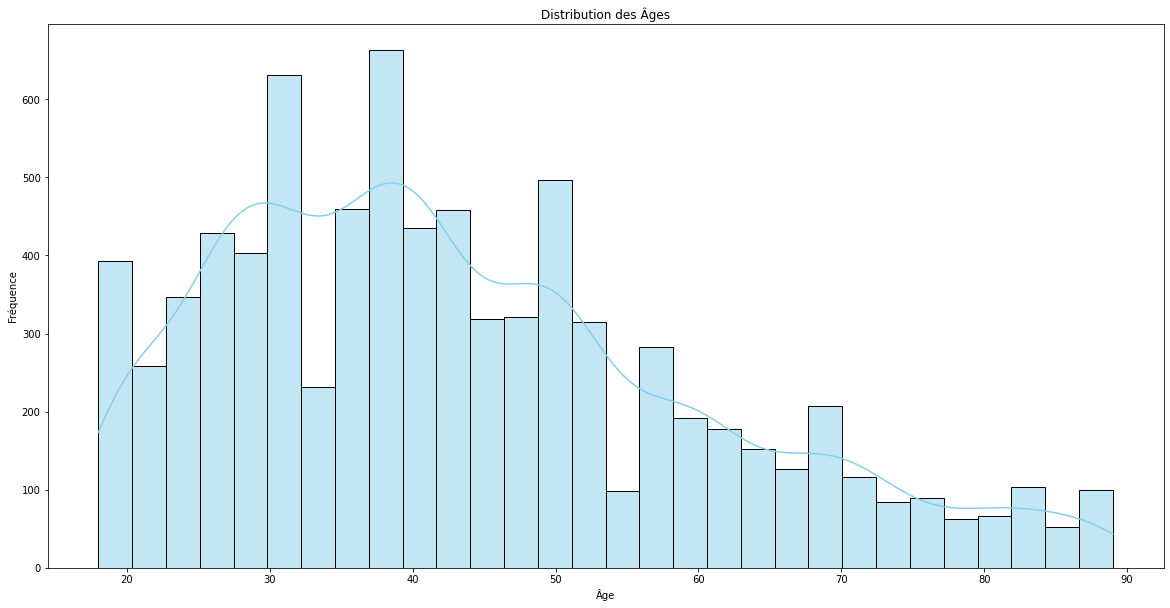

In [12]:
# Histogramme de la variable Age

# Dimension de la figure
plt.figure(figsize=(20, 10))

# Histogramme avec seaborn 
sns.histplot(data=df,           # Jeu de données
             x='Age',           # Variable sur l'axe X
             bins=30,           # Nombre de barres
             kde=True,          # Ajout de la courbe de densité
             color='skyblue'    # Couleur des barres
             )

# Ajout d'un titre et des labels
plt.title('Distribution des Âges')

# Ajout d'une grille
plt.xlabel('Âge')

# Ajout d'une grille
plt.ylabel('Fréquence')

# Affichage de la figure
plt.show()

In [13]:
# Observez l'histogramme de la variable Work_Experience

# 1. Dimension de la figure


# 2. Histogramme avec seaborn


# 3. Ajout d'un titre et des labels


# 4. Affichage de la figure


In [14]:
# Observez la distribution de la variable Spending_Score


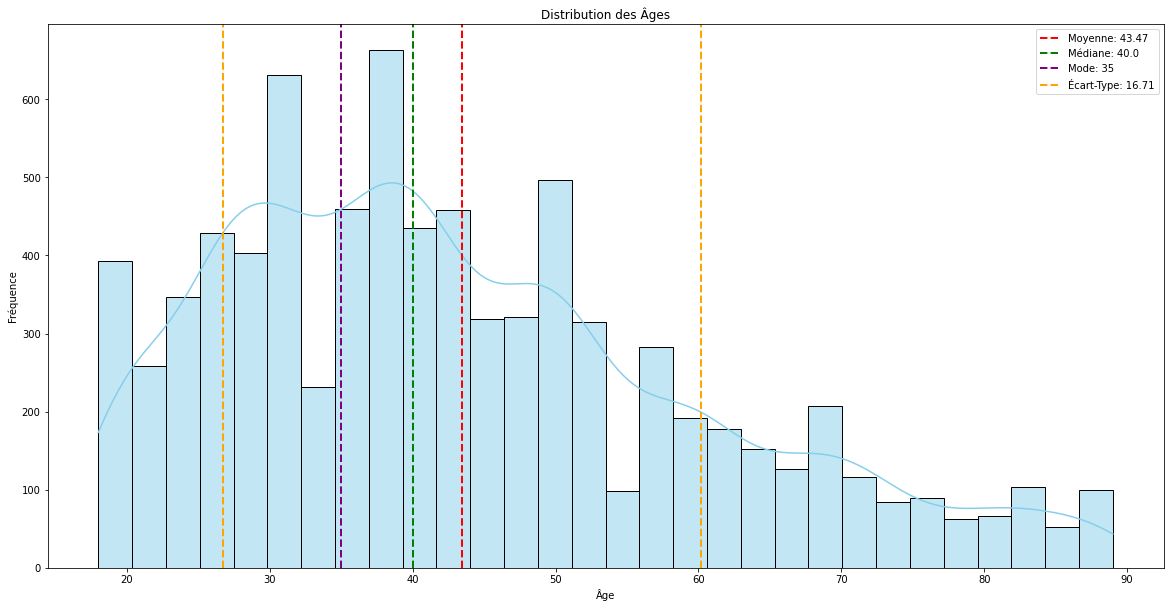

In [15]:
# 'Age' est la colonne à analyser
plt.figure(figsize=(20, 10))

# Distribution des Âges
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des Âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')


# Tendance Centrale
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]  # mode() renvoie une série, prenez le premier élément

# Ajout des lignes verticales pour la moyenne, la médiane et le mode
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Médiane: {median_age}')
plt.axvline(mode_age, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age}')
plt.legend()

# Dispersion
range_age = df['Age'].max() - df['Age'].min()
std_age = df['Age'].std()

# Ajout des lignes verticales pour l'écart-type et l'étendue
plt.axvline(mean_age + std_age, color='orange', linestyle='dashed', linewidth=2, label=f'Écart-Type: {std_age:.2f}')
plt.axvline(mean_age - std_age, color='orange', linestyle='dashed', linewidth=2)
plt.legend()

# Affichage du graphique
plt.show()

In [16]:
# Afficher l'historique de la variable 'Work_Experience' avec les lignes verticales pour la moyenne, la médiane et le mode ainsi que l'écart-type et l'étendue

### **Analyse univariée** : Boîtes à moustaches (Boxplots)

Les boxplots sont un autre type de graphique univarié qui permet de visualiser la distribution des données. Ils sont utiles pour identifier les valeurs aberrantes (outliers) et les tendances centrales, et pour comparer les distributions entre différentes variables. Les éléments à observer sont les suivants :

- **Boîte (Interquartile Range - IQR)** : La boîte représente la plage interquartile, c'est-à-dire la zone où se situent les 25% inférieurs et les 25% supérieurs des données. La longueur de la boîte est donc l'IQR.

- **Ligne Médiane (Q2 ou Médiane)** : La ligne à l'intérieur de la boîte représente la médiane des données, indiquant la valeur centrale.

- **Whiskers (Moustaches)** : Les moustaches s'étendent généralement jusqu'à 1,5 fois l'IQR à partir des bords de la boîte. Les points situés au-delà de cette distance sont considérés comme des valeurs aberrantes (outliers) et sont représentés individuellement.

- **Points** (Outliers) : Les points situés au-delà des moustaches sont généralement marqués comme des valeurs aberrantes et sont affichés individuellement.

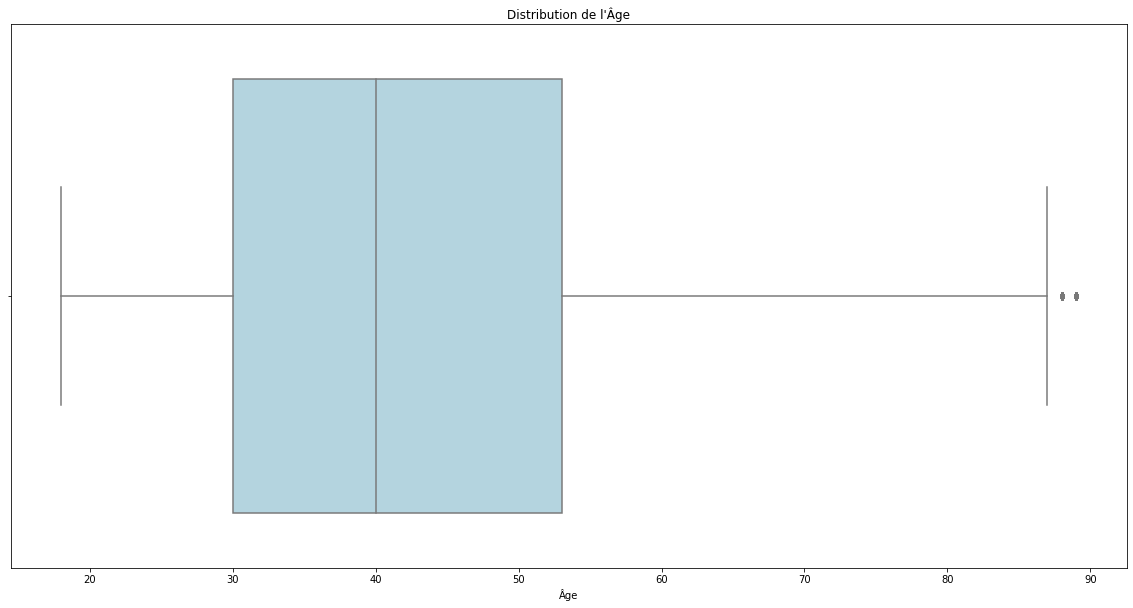

In [17]:
# Exemple pour la variable 'Age'
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age', data=df, color='lightblue')
plt.title('Distribution de l\'Âge')
plt.xlabel('Âge')
plt.show()

In [18]:
# Observez la boite à moustache de la variable Family_Size


### **Analyse univariée** : Diagrammes circulaires (Pie Charts)

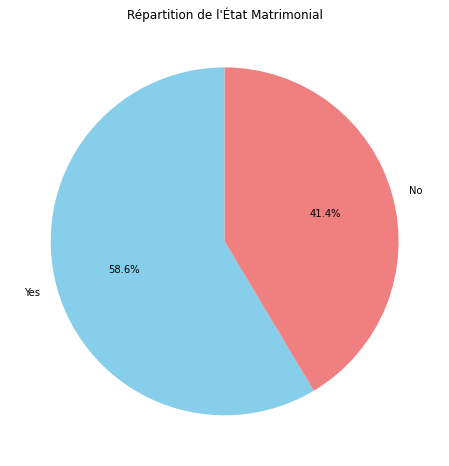

In [19]:
# Exemple pour la variable 'Ever_Married'
plt.figure(figsize=(8, 8))
df['Ever_Married'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Répartition de l\'État Matrimonial')
plt.ylabel('')
plt.show()

In [20]:
# Observez la boite à moustache de la variable Ever_Married


### **Analyse univariée** : Diagrammes à barres (Bar Charts)

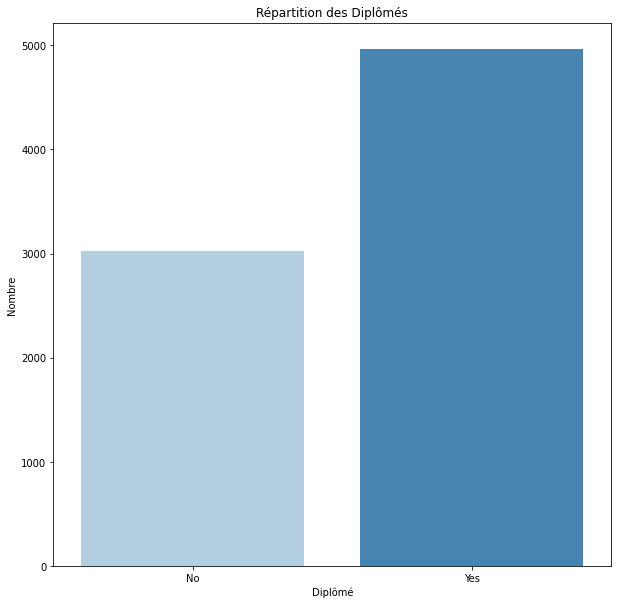

In [21]:
# Barplot de la variable 'Graduated'
plt.figure(figsize=(10, 10))
sns.countplot(x='Graduated', data=df, palette='Blues')
plt.title('Répartition des Diplômés')
plt.xlabel('Diplômé')
plt.ylabel('Nombre')
plt.show()


In [22]:
# Observez la distribution de la variable 'Profession'


### **Analyse bivariée/multivariée** : Diagramme en violon (Violin plot)

Un violin plot est une visualisation qui combine les caractéristiques d'un box plot (boîte à moustaches) avec celles d'un kernel density plot. Il permet de visualiser la distribution des données pour une variable continue ou catégorielle. Voici comment créer un violin plot en utilisant la bibliothèque Seaborn en Python :

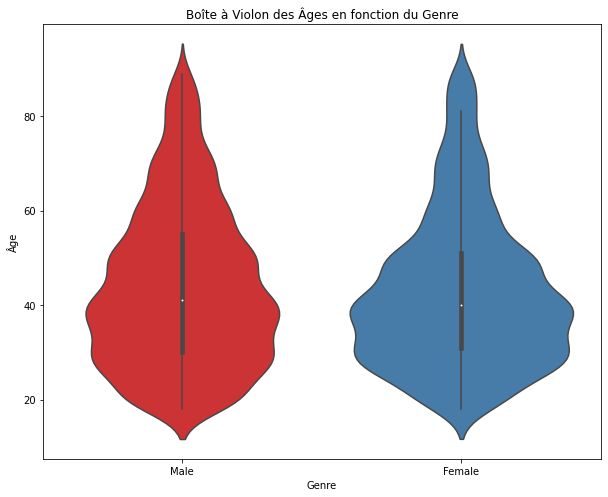

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.violinplot(x='Gender', 
               y='Age', 
               data=df, 
               palette='Set1'
               )
plt.title('Boîte à Violon des Âges en fonction du Genre')
plt.xlabel('Genre')
plt.ylabel('Âge')
plt.show()

In [24]:
# Observez le diagramme en violon de la variable 'Age' en fonction du genre


### **Analyse bivariée/multivariée** : Nuages de points (Scatter plots)

<img src='https://i.stack.imgur.com/lHnhC.png'>

Un scatter plot (ou diagramme de dispersion) est une visualisation graphique utilisée pour représenter la relation entre deux variables continues. C'est un outil puissant dans l'analyse des données pour plusieurs raisons. 

- Relation entre Deux Variables : Il permet de visualiser la relation entre deux variables continues, permettant de déterminer s'il existe une corrélation, une tendance ou une structure dans les données.

- Identification des Patterns : Il aide à identifier des patterns, des clusters ou des groupes de points qui pourraient indiquer des structures intéressantes dans les données.

- Détection des Outliers : Il facilite la détection d'éventuels outliers ou valeurs aberrantes qui peuvent avoir un impact significatif sur l'analyse.

- Visualisation de la Corrélation : Il permet de visualiser la force et la direction de la corrélation entre deux variables. Une corrélation positive est indiquée par des points se déplaçant vers le haut à droite, tandis qu'une corrélation négative est indiquée par des points se déplaçant vers le bas à droite.

- Comparaison entre Groupes : Si les points sont colorés ou marqués en fonction d'une autre variable catégorielle, le scatter plot permet de comparer la distribution des points entre différents groupes.

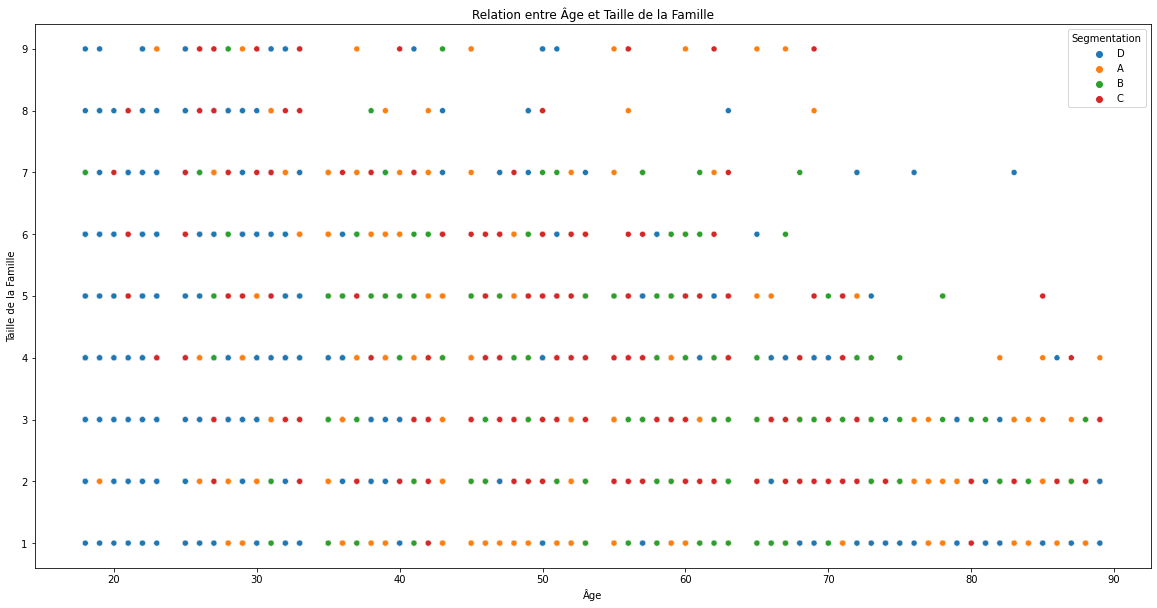

In [25]:
# Exemple pour 'Age' vs 'Family_Size'
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Age', y='Family_Size', data=df, hue='Segmentation')
plt.title('Relation entre Âge et Taille de la Famille')
plt.xlabel('Âge')
plt.ylabel('Taille de la Famille')
plt.show()

In [26]:
# Observez la relation entre 'Age' et 'Family_Size'


### **Analyse bivariée/multivariée** : Heatmaps de corrélation

Un heatmap de corrélation est une visualisation graphique qui représente les corrélations entre différentes variables d'un ensemble de données sous forme de couleurs. Cette technique est particulièrement utile pour comprendre les relations entre plusieurs variables

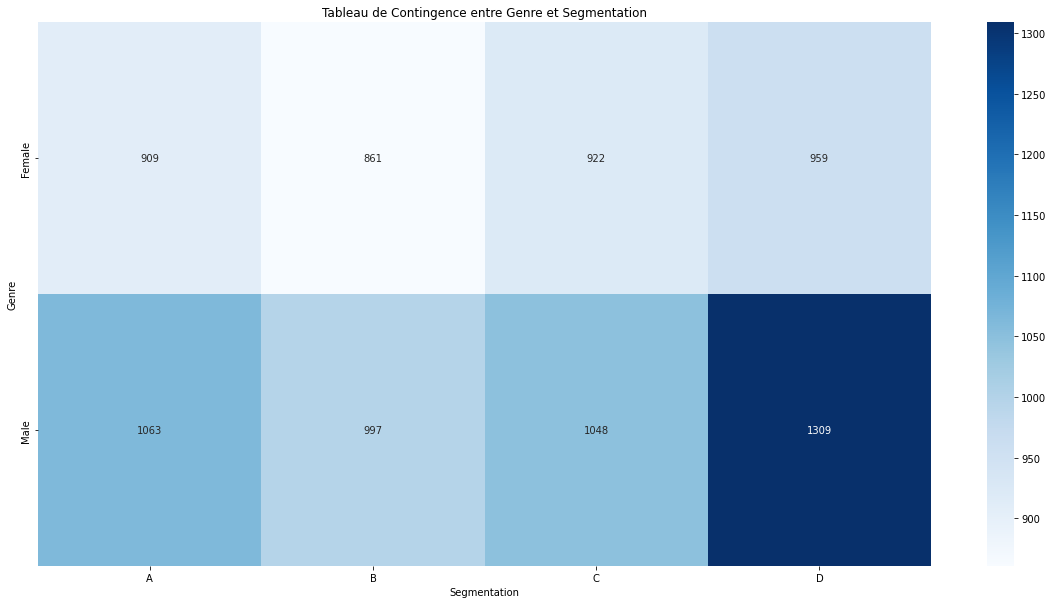

In [27]:
# Exemple pour 'Gender' vs 'Segmentation'
contingency_table = pd.crosstab(df['Gender'], df['Segmentation'])

plt.figure(figsize=(20, 10))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Tableau de Contingence entre Genre et Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Genre')
plt.show()

In [28]:
# Observer le heatmap des variables Gender et Family_Size


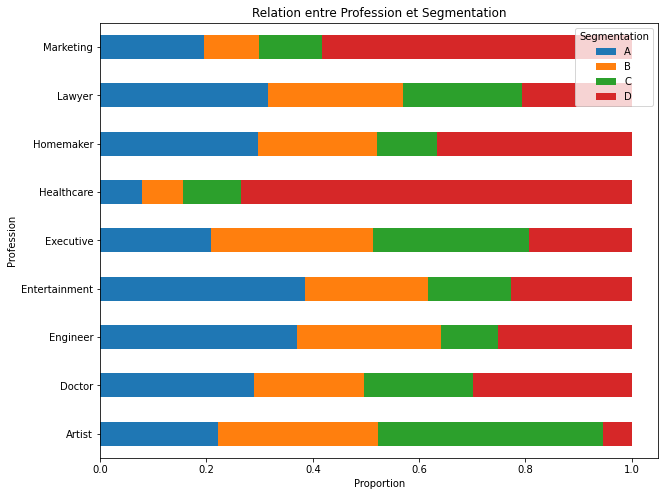

In [29]:
# Observation des relation de contingence
pd.crosstab(
    df['Profession'],
    df['Segmentation'],
    normalize='index'
).plot.barh(stacked=True, figsize=(10, 8))
plt.title('Relation entre Profession et Segmentation')
plt.xlabel('Proportion')
plt.ylabel('Profession')
plt.show()

In [30]:
# Observez la relation entre 'Graduated' et 'Segmentation'


# 3. Data Preparation/Data Cleaning

Le nettoyage des données est une étape cruciale pour garantir la qualité de nos analyses. Cela implique la gestion des valeurs manquantes, la correction des erreurs, la normalisation des données, et la transformation des variables si nécessaire.

In [31]:
# Rappele des données manquantes
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [32]:
# Suppression des valeurs dupliquées
df = df.drop_duplicates()
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [33]:
# Suppression des valeurs manquantes
df.dropna(inplace=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [34]:
# Suppression des colonnes inutiles
df = df.drop(['ID'], axis=1, inplace=False)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [35]:
# Remplacement des valeurs manquantes par la moyenne
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)

In [36]:
# Transformation des variables catégorielles en variables numériques
pd.options.mode.chained_assignment = None

def categorical(dataframe:pd.DataFrame, columns:list[str]):
    dataframe = dataframe.dropna()
    for column in columns:
        liste_ = list(dataframe[column].value_counts().index)
        dataframe[column] = dataframe[column].apply(lambda x: liste_.index(x))
    return dataframe

df_ = categorical(df, ['Gender', 'Ever_Married', 'Graduated', 'Segmentation'])
df_

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,22,1,Healthcare,1.0,Low,4.0,Cat_4,0
2,1,0,67,0,Engineer,1.0,Low,1.0,Cat_6,3
3,0,0,67,0,Lawyer,0.0,High,2.0,Cat_6,3
5,0,0,56,1,Artist,0.0,Average,2.0,Cat_6,1
6,0,1,32,0,Healthcare,1.0,Low,3.0,Cat_6,1
...,...,...,...,...,...,...,...,...,...,...
8062,0,0,41,0,Artist,0.0,High,5.0,Cat_6,3
8064,0,1,35,1,Executive,3.0,Low,4.0,Cat_4,0
8065,1,1,33,0,Healthcare,1.0,Low,1.0,Cat_6,0
8066,1,1,27,0,Healthcare,1.0,Low,4.0,Cat_6,3


In [37]:
# One Hot Encoding des variables catégorielles
df_ = pd.get_dummies(df_, columns=['Profession'], prefix='Profession')
df_ = pd.get_dummies(df_, columns=['Spending_Score'], prefix='Spending_Score')
df_ = pd.get_dummies(df_, columns=['Var_1'], prefix='Var_1')
df_

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,22,1,1.0,4.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,67,0,1.0,1.0,3,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,67,0,0.0,2.0,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,0,56,1,0.0,2.0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,0,1,32,0,1.0,3.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,0,0,41,0,0.0,5.0,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8064,0,1,35,1,3.0,4.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8065,1,1,33,0,1.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8066,1,1,27,0,1.0,4.0,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### **Analyse multivariée** : Heatmaps de corrélation

Une matrice de corrélation, telle que celle générée par df_.corr(), fournit des informations sur les relations linéaires entre les différentes variables dans un ensemble de données. Voici comment interpréter une matrice de corrélation :

**Valeurs de Corrélation** : Les valeurs dans la matrice varient de -1 à 1.

    -1 : Corrélation négative parfaite.
     0 : Aucune corrélation.
     1 : Corrélation positive parfaite.
**Direction de la Corrélation** : Si la valeur est positive, les variables évoluent dans la même direction. Si la valeur est négative, les variables évoluent dans des directions opposées. La magnitude de la valeur indique la force de la corrélation. Plus la valeur est proche de -1 ou 1, plus la corrélation est forte.

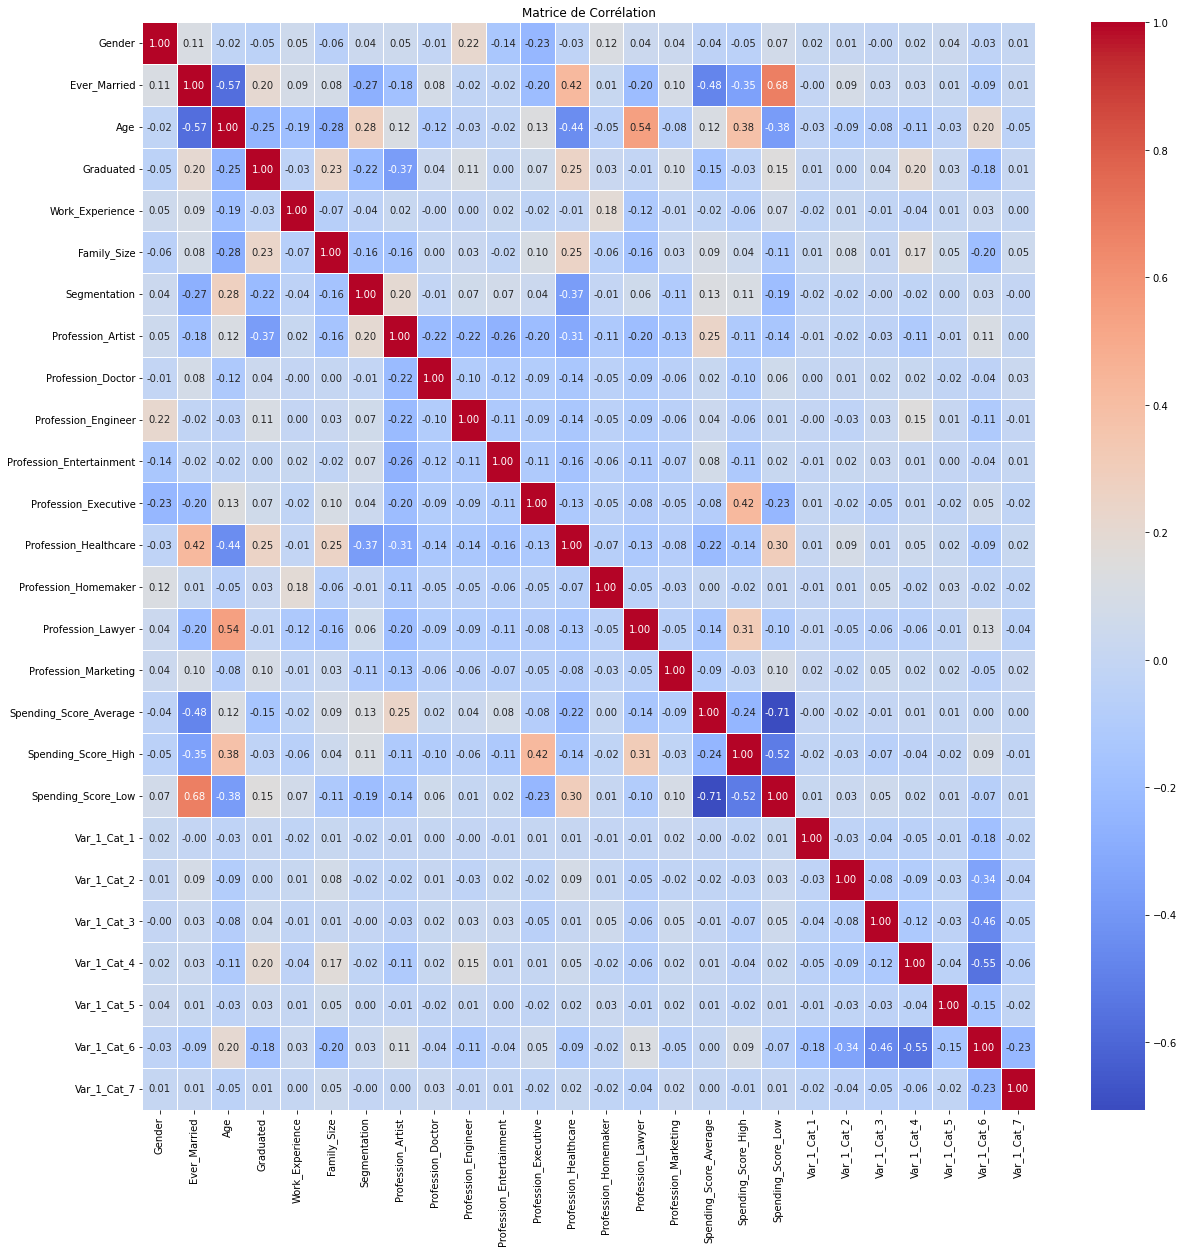

In [38]:
# Observation de la matrice de corrélation
plt.figure(figsize=(20, 20))
sns.heatmap(df_.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()


**Interprétation** :

- Une valeur proche de 1 indique une forte corrélation positive, ce qui signifie que lorsque l'une des variables augmente, l'autre a tendance à augmenter également.
- Une valeur proche de -1 indique une forte corrélation négative, ce qui signifie que lorsque l'une des variables augmente, l'autre a tendance à diminuer.
- Une valeur proche de 0 indique une faible corrélation ou aucune corrélation.

- Matrice Symétrique : La matrice de corrélation est symétrique par rapport à sa diagonale principale. Les corrélations entre les variables sont réciproques, ce qui signifie que la corrélation entre A et B est la même que la corrélation entre B et A.

# 4. Enregistrement des données et du fichier notebook

In [39]:
# Sauvegarde du jeu de données

df_.to_csv('data_clean.csv', index=False)

In [40]:
# Convertir un fichier Jupyter Notebook en page HTML
!jupyter nbconvert --to html "1. Data Preparation.ipynb"

[NbConvertApp] WARNING | pattern '1. Data Preparation.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe

In [41]:
# Ajouter un fichier HTML dans une app Streamlit avec ces deux lignes de code

import streamlit.components.v1 as components
components.html(open("1. Data Preparation.html").read(), height=10000, scrolling=False)

2023-12-05 17:08:34.349 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()